In [1]:
!pip install --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0 lightgbm==4.1.0
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have nump

In [2]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

In [3]:
df =pd.read_csv("/kaggle/input/kepler-object-of-interest-preprocessed/koi_preprocessed.csv")

Loading Kepler data from local Kaggle file...
Resampling enabled: 'smote'. `class_weight` will be disabled.
Performing advanced feature engineering...
Fitting KMeans for cluster features...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['koi_longp' 'koi_ingress' 'koi_model_dof' 'koi_model_chisq' 'koi_sage']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Performing fast feature selection based on LightGBM importance...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Feature selection kept 15117 out of 15117 features.

--- Generating OOF Predictions for Meta-Model Training ---
--- Fold 1/5 ---
--- Fold 2/5 ---
--- Fold 3/5 ---
--- Fold 4/5 ---
--- Fold 5/5 ---

--- Training Calibrator and Tuning Thresholds ---
Tuning probability thresholds...
Found optimal thresholds: {0: 0.403448275862069, 1: 0.3758620689655173, 2: 0.4862068965517242}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Training Final Models on All Data ---

Training complete.
Saving model to ultimate_exoplanet_model.joblib...
Model saved successfully.
Model loaded successfully from ultimate_exoplanet_model.joblib.
Performing advanced feature engineering...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['koi_longp' 'koi_ingress' 'koi_model_dof' 'koi_model_chisq' 'koi_sage']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Performing advanced feature engineering...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['koi_longp' 'koi_ingress' 'koi_model_dof' 'koi_model_chisq' 'koi_sage']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



--- Final Model Evaluation ---
Accuracy: 0.9326
Weighted ROC AUC Score: 0.9885

Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.88      0.86      0.87       484
     CONFIRMED       0.86      0.88      0.87       461
FALSE POSITIVE       0.99      1.00      0.99       968

      accuracy                           0.93      1913
     macro avg       0.91      0.91      0.91      1913
  weighted avg       0.93      0.93      0.93      1913



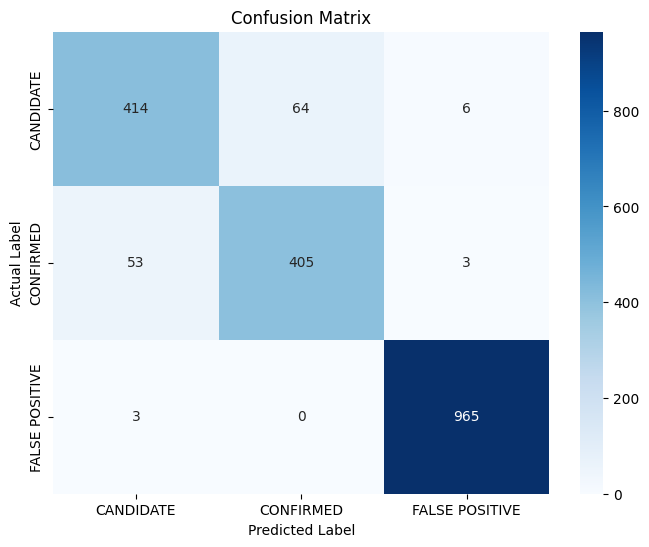

Confusion matrix saved to ultimate_confusion_matrix.png


In [4]:
# --- FIX 4: Prevent OpenBLAS from over-threading, which can cause hangs. ---
# This must be set before importing numpy or sklearn.
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
import joblib
import optuna
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- ADVANCED IMPORTS ---
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

# =====================================================================================
# --- CRITICAL FIX FOR THE DEFAULT KAGGLE ENVIRONMENT ---
#
# The default Kaggle environment has known version conflicts. To fix this,
# you MUST perform these steps exactly:
#
# 1. RESTART THE SESSION:
#    - In the right-hand panel, under "Session", click the power icon to "Stop Session".
#    - Wait for it to shut down, then click "Start Session".
#
# 2. RUN THIS COMMAND IN A NEW, EMPTY CELL (BEFORE RUNNING THE MODEL):
#
# !pip install --upgrade scikit-learn==1.3.2 imblearn-learn==0.11.0 lightgbm==4.1.0 optuna==3.5.0
#
# 3. After the command completes, you can run the rest of this script.
# =====================================================================================

optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


class UltimateExoplanetStackingModel:
    """
    An advanced, SOTA Exoplanet Stacking Model, optimized for speed and stability.
    This corrected version ensures that the KMeans clustering model is stateful,
    meaning it's fitted once during training and reused correctly for predictions.
    """
    def __init__(self, base_models, meta_model, n_splits=5, random_state=42, 
                 resampling_strategy='smote', use_feature_selection=True):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_splits = n_splits
        self.random_state = random_state
        self.resampling_strategy = resampling_strategy
        self.use_feature_selection = use_feature_selection
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        
        self.preprocessor = None
        self.label_encoder = LabelEncoder()
        self.feature_selector_ = None
        self.fitted_base_models_ = {}
        self.fitted_calibrator_ = None
        self.optimal_thresholds_ = None
        self.feature_names_in_ = None
        self.feature_names_out_ = None
        self.classes_ = None
        self.kmeans_ = None

        if self.resampling_strategy:
            print(f"Resampling enabled: '{self.resampling_strategy}'. `class_weight` will be disabled.")
            for model in self.base_models.values():
                if 'class_weight' in model.get_params(): model.set_params(class_weight=None)
            if 'class_weight' in self.meta_model.get_params(): self.meta_model.set_params(class_weight=None)

    def _feature_engineer(self, X, is_training=False):
        """Performs advanced feature engineering with a stateful KMeans model."""
        print("Performing advanced feature engineering...")
        X_eng = X.copy()
        epsilon = 1e-6

        X_eng['planet_star_radius_ratio'] = X_eng['koi_prad'] / (X_eng['koi_srad'] + epsilon)
        X_eng['stellar_gravity'] = X_eng['koi_smass'] / (X_eng['koi_srad']**2 + epsilon)
        X_eng['stellar_density'] = X_eng['koi_smass'] / (X_eng['koi_srad']**3 + epsilon)
        X_eng['duration_over_period'] = X_eng['koi_duration'] / (X_eng['koi_period'] + epsilon)
        X_eng['depth_to_snr'] = X_eng['koi_depth'] / (X_eng['koi_model_snr'] + epsilon)

        temp_bins = [0, 3000, 5000, 6000, 7500, np.inf]
        temp_labels = ['M-type', 'K-type', 'G-type', 'F-type', 'A-type']
        X_eng['star_type'] = pd.cut(X_eng['koi_steff'], bins=temp_bins, labels=temp_labels)

        cluster_features = ['koi_period', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq']
        X_cluster_imputed = X_eng[cluster_features].fillna(X_eng[cluster_features].median())
        
        if is_training:
            print("Fitting KMeans for cluster features...")
            self.kmeans_ = KMeans(n_clusters=5, random_state=self.random_state, n_init='auto')
            X_eng['koi_cluster'] = self.kmeans_.fit_predict(X_cluster_imputed)
        else:
            if not hasattr(self, 'kmeans_') or self.kmeans_ is None:
                raise RuntimeError("KMeans model has not been fitted. Call train first.")
            try:
                check_is_fitted(self.kmeans_)
                X_eng['koi_cluster'] = self.kmeans_.predict(X_cluster_imputed)
            except NotFittedError:
                 raise RuntimeError("KMeans model is not fitted. Loaded model might be corrupted.")

        return X_eng

    def _build_preprocessor(self, numerical_features, categorical_features):
        numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
        categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ],
            remainder='passthrough',
            n_jobs=-1
        )

    def _select_features(self, X_processed, y):
        print("Performing fast feature selection based on LightGBM importance...")
        estimator = lgb.LGBMClassifier(random_state=self.random_state, n_jobs=-1, device='gpu', verbose=-1)
        selector = SelectFromModel(estimator, prefit=False, threshold='median')
        
        selector.fit(X_processed, y)
        self.feature_selector_ = selector
        
        n_selected = selector.get_support().sum()
        print(f"Feature selection kept {n_selected} out of {X_processed.shape[1]} features.")
        return selector.transform(X_processed)

    def _tune_base_model(self, model_name, X_train, y_train):
        print(f"Tuning {model_name}...")
        def objective(trial):
            base_model_params = self.base_models[model_name].get_params()

            if model_name == 'rand_forest':
                params = {'n_estimators': trial.suggest_int('n_estimators', 100, 500), 'max_depth': trial.suggest_int('max_depth', 5, 30), 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)}
            elif model_name == 'lgbm':
                params = {'n_estimators': trial.suggest_int('n_estimators', 200, 1000), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2), 'num_leaves': trial.suggest_int('num_leaves', 20, 100)}
            elif model_name == 'xgb':
                params = {'n_estimators': trial.suggest_int('n_estimators', 200, 1000), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2), 'max_depth': trial.suggest_int('max_depth', 3, 10)}
            elif model_name == 'catboost':
                params = {'iterations': trial.suggest_int('iterations', 200, 1000), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2), 'depth': trial.suggest_int('depth', 3, 10)}
            else: return -1

            model = self.base_models[model_name].__class__(**base_model_params)
            model.set_params(**params)
            
            pipeline = ImbPipeline([('model', model)])
            if self.resampling_strategy:
                resampler = {'smote': SMOTE, 'adasyn': ADASYN}[self.resampling_strategy](random_state=self.random_state)
                pipeline.steps.insert(0, ('resampler', resampler))
            
            return cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=3, scoring='roc_auc_ovr_weighted').mean()

        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=15, n_jobs=-1)
        print(f"Best params for {model_name}: {study.best_params}")
        self.base_models[model_name].set_params(**study.best_params)

    def _tune_thresholds(self, y_true, oof_proba):
        print("Tuning probability thresholds...")
        self.optimal_thresholds_ = {}
        for i in range(oof_proba.shape[1]):
            best_threshold, best_f1 = 0.5, 0
            y_true_class = (y_true == i).astype(int)
            for threshold in np.linspace(0.1, 0.9, 30):
                y_pred_class = (oof_proba[:, i] > threshold).astype(int)
                f1 = f1_score(y_true_class, y_pred_class, zero_division=0)
                if f1 > best_f1:
                    best_f1, best_threshold = f1, threshold
            self.optimal_thresholds_[i] = best_threshold
        print(f"Found optimal thresholds: {self.optimal_thresholds_}")

    def train(self, X, y, tune_hyperparameters=False):
        """Main training method with complete logic."""
        self.feature_names_in_ = X.columns.tolist()
        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        n_classes = len(self.classes_)
        
        X_engineered = self._feature_engineer(X, is_training=True)
        numerical_features = X_engineered.select_dtypes(include=np.number).columns.tolist()
        categorical_features = X_engineered.select_dtypes(exclude=np.number).columns.tolist()
        
        self._build_preprocessor(numerical_features, categorical_features)
        X_processed_full = self.preprocessor.fit_transform(X_engineered)
        self.feature_names_out_ = self.preprocessor.get_feature_names_out()

        if self.use_feature_selection:
            X_final_full = self._select_features(X_processed_full, y_encoded)
        else:
            X_final_full = X_processed_full
            
        if tune_hyperparameters:
            print("\n--- Hyperparameter Tuning ---")
            for name in self.base_models.keys():
                self._tune_base_model(name, X_final_full, y_encoded)

        print("\n--- Generating OOF Predictions for Meta-Model Training ---")
        base_oof_preds = np.zeros((len(X), len(self.base_models) * n_classes))

        for fold, (train_index, val_index) in enumerate(self.skf.split(X, y_encoded)):
            print(f"--- Fold {fold+1}/{self.n_splits} ---")
            X_train_proc, X_val_proc = X_processed_full[train_index], X_processed_full[val_index]
            y_train_enc = y_encoded[train_index]
            
            X_train_final = self.feature_selector_.transform(X_train_proc) if self.use_feature_selection else X_train_proc
            X_val_final = self.feature_selector_.transform(X_val_proc) if self.use_feature_selection else X_val_proc
            
            if self.resampling_strategy:
                resampler = {'smote': SMOTE, 'adasyn': ADASYN}[self.resampling_strategy](random_state=self.random_state, n_jobs=-1)
                X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_final, y_train_enc)
            else:
                X_train_resampled, y_train_resampled = X_train_final, y_train_enc

            fold_base_preds = []
            for model in self.base_models.values():
                model.fit(X_train_resampled, y_train_resampled)
                val_preds_proba = model.predict_proba(X_val_final)
                fold_base_preds.append(val_preds_proba)
            
            base_oof_preds[val_index, :] = np.hstack(fold_base_preds)

        print("\n--- Training Calibrator and Tuning Thresholds ---")
        calibrator = CalibratedClassifierCV(self.meta_model, cv=self.skf, method='isotonic')
        meta_oof_proba = cross_val_predict(calibrator, base_oof_preds, y_encoded, cv=self.skf, method='predict_proba', n_jobs=-1)
        self._tune_thresholds(y_encoded, meta_oof_proba)
        self.fitted_calibrator_ = calibrator.fit(base_oof_preds, y_encoded)
        
        print("\n--- Training Final Models on All Data ---")
        if self.resampling_strategy:
             resampler_final = {'smote': SMOTE, 'adasyn': ADASYN}[self.resampling_strategy](random_state=self.random_state, n_jobs=-1)
             X_final_resampled, y_final_resampled = resampler_final.fit_resample(X_final_full, y_encoded)
        else:
             X_final_resampled, y_final_resampled = X_final_full, y_encoded

        for name, model in self.base_models.items():
            model.fit(X_final_resampled, y_final_resampled)
            self.fitted_base_models_[name] = model
            
        print("\nTraining complete.")

    def predict_proba(self, X_new):
        """Generates class probabilities using the fitted pipeline."""
        if not self.fitted_calibrator_: raise RuntimeError("Model has not been trained yet.")
        
        X_new_eng = self._feature_engineer(X_new.loc[:, self.feature_names_in_], is_training=False)
        X_new_proc = self.preprocessor.transform(X_new_eng)
        
        X_new_final = self.feature_selector_.transform(X_new_proc) if self.use_feature_selection else X_new_proc
        
        base_predictions = [model.predict_proba(X_new_final) for model in self.fitted_base_models_.values()]
        stacked_base_predictions = np.hstack(base_predictions)
        
        return self.fitted_calibrator_.predict_proba(stacked_base_predictions)

    def predict(self, X_new):
        """Generates final class predictions using optimal thresholds."""
        probabilities = self.predict_proba(X_new)
        preds = np.zeros(len(probabilities), dtype=int)
        
        optimal_thresholds_list = [self.optimal_thresholds_[i] for i in range(len(self.classes_))]
        
        for i in range(len(probabilities)):
            passed_classes = np.where(probabilities[i] >= optimal_thresholds_list)[0]
            if len(passed_classes) == 0:
                preds[i] = np.argmax(probabilities[i])
            else:
                preds[i] = passed_classes[np.argmax(probabilities[i][passed_classes])]
        return self.label_encoder.inverse_transform(preds)

    def save(self, filepath):
        print(f"Saving model to {filepath}...")
        joblib.dump(self, filepath)
        print("Model saved successfully.")

    @staticmethod
    def load(filepath):
        model = joblib.load(filepath)
        print(f"Model loaded successfully from {filepath}.")
        return model

    def plot_confusion_matrix(self, y_true, y_pred, filename='confusion_matrix.png'):
        cm = confusion_matrix(y_true, y_pred, labels=self.classes_)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.classes_, yticklabels=self.classes_)
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.savefig(filename)
        plt.show()
        print(f"Confusion matrix saved to {filename}")

# --- USAGE EXAMPLE ---
if __name__ == '__main__':
    print("Loading Kepler data from local Kaggle file...")
    try:
        # Make sure the path is correct for your Kaggle environment
        df = pd.read_csv('/kaggle/input/kepler-koi-csv/kepler_koi.csv', comment='#')
        df.dropna(subset=['koi_disposition'], inplace=True)
    except FileNotFoundError:
        print("Error: Kepler CSV file not found. Please check the path in the 'Input' section of your Kaggle notebook.")
        exit()
    except Exception as e:
        print(f"Error loading data: {e}.")
        exit()
    
    df = df.rename(columns=lambda x: x.strip())
    # The target column is 'koi_disposition'
    X = df.drop(columns=['koi_disposition', 'koi_pdisposition', 'koi_score', 'rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'], errors='ignore')
    y = df['koi_disposition']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    TUNE_HYPERPARAMETERS = False

    base_models_dict = {
        'lgbm': lgb.LGBMClassifier(random_state=42, n_jobs=-1, device='gpu', verbose=-1),
        'xgb': xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist'),
        'catboost': cb.CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False, task_type='GPU'),
        'rand_forest': RandomForestClassifier(random_state=42, n_jobs=-1)
    }

    meta_model_instance = LogisticRegression(random_state=42, n_jobs=-1)

    ultimate_model = UltimateExoplanetStackingModel(
        base_models=base_models_dict, 
        meta_model=meta_model_instance,
        resampling_strategy='smote',
        use_feature_selection=True
    )
    
    ultimate_model.train(X_train, y_train, tune_hyperparameters=TUNE_HYPERPARAMETERS)
    
    model_filepath = 'ultimate_exoplanet_model.joblib'
    ultimate_model.save(model_filepath)
    
    # Clean up memory before loading
    del ultimate_model
    loaded_model = UltimateExoplanetStackingModel.load(model_filepath)
    
    predictions = loaded_model.predict(X_test)
    probabilities = loaded_model.predict_proba(X_test)
    
    print("\n--- Final Model Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    
    try:
        auc_score = roc_auc_score(y_test, probabilities, multi_class='ovr', average='weighted')
        print(f"Weighted ROC AUC Score: {auc_score:.4f}")
    except ValueError as e:
        print(f"Could not calculate AUC: {e}")

    print("\nClassification Report:\n", classification_report(y_test, predictions, labels=loaded_model.classes_))
    
    loaded_model.plot_confusion_matrix(y_test, predictions, filename='ultimate_confusion_matrix.png')
